In [136]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/comic-characters/comic_characters.csv


## ****Data Loading

In [137]:
df=pd.read_csv('/kaggle/input/comic-characters/comic_characters.csv')
df.head(10)

,Id,Name,Identity,Alignment,Eyes,Hair,Sex,Alive,Appearances,First_appeared,Planet,Universe
0,0,Dave Finn,Secret,Good,Blue,Black,Male,Yes,1,"2002, July",Earth-616,Marvel
1,1,Katherine Power,Secret,Good,Blue,Red,Female,Yes,106,"1984, August",Earth-616,Marvel
2,2,John Malone,Secret,Bad,Blue,White,Male,Yes,15,"1985, January",New Earth,DC
3,3,"Samuel Bradley, Jr.",Public,Bad,Brown,Brown,Male,No,19,"2004, March",New Earth,DC
4,4,Hope Taya,Public,Bad,Brown,Black,Female,Yes,28,"1999, December",New Earth,DC
5,5,Trygg,Secret,Bad,Black,Black,Male,Yes,3,"1940, June",New Earth,DC
6,6,Boris Dmitravich Razumihin,Public,Good,Brown,Black,Male,Yes,7,"1987, December",New Earth,DC
7,7,Perry White,Public,Good,Blue,Brown,Male,Yes,350,"1986, October",New Earth,DC
8,8,Perkins,Public,Bad,Green,White,Female,Yes,1,"1964, October",Earth-616,Marvel
9,9,Zuhn,Secret,Bad,White,Blond,Male,No,3,"2000, November",Earth-616,Marvel


In [138]:
df.describe()

,Id,Appearances
count,21144.000000,21144.000000
mean,10571.500000,19.329502
std,6103.891382,94.444348
min,0.000000,1.000000
25%,5285.750000,1.000000
50%,10571.500000,4.000000
75%,15857.250000,10.000000
max,21143.000000,4043.000000


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21144 entries, 0 to 21143
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              21144 non-null  int64 
 1   Name            21144 non-null  object
 2   Identity        21144 non-null  object
 3   Alignment       21144 non-null  object
 4   Eyes            21144 non-null  object
 5   Hair            21144 non-null  object
 6   Sex             21144 non-null  object
 7   Alive           21144 non-null  object
 8   Appearances     21144 non-null  int64 
 9   First_appeared  21144 non-null  object
 10  Planet          21144 non-null  object
 11  Universe        21144 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.9+ MB


In [140]:
df.isnull().sum()

Id                0
Name              0
Identity          0
Alignment         0
Eyes              0
Hair              0
Sex               0
Alive             0
Appearances       0
First_appeared    0
Planet            0
Universe          0
dtype: int64

In [141]:
df.columns

Index(['Id', 'Name', 'Identity', 'Alignment', 'Eyes', 'Hair', 'Sex', 'Alive',
       'Appearances', 'First_appeared', 'Planet', 'Universe'],
      dtype='object')

In [142]:
numeric_df = df.select_dtypes(include=['int64'])
corel = numeric_df.corr()  

In [143]:
corel

,Id,Appearances
Id,1.00000,-0.01105
Appearances,-0.01105,1.00000


## ****Exploratory Data Analysis

# Correlation of numerical features

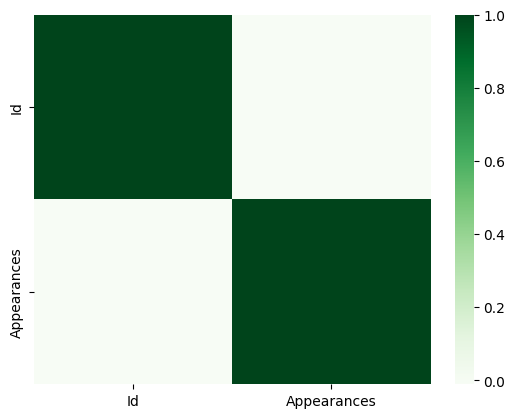

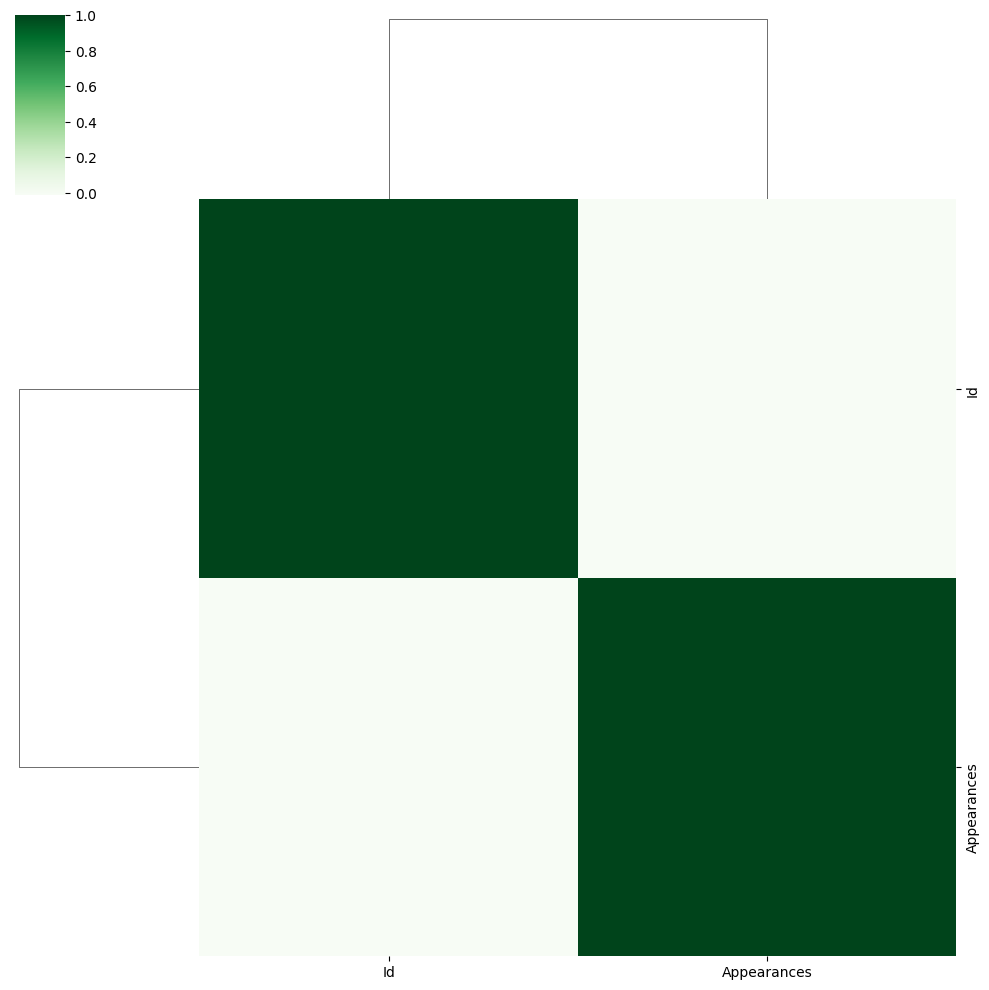

In [144]:
sns.heatmap(corel,cmap='Greens')
plt.show()

sns.clustermap(corel,cmap='Greens')
plt.show()

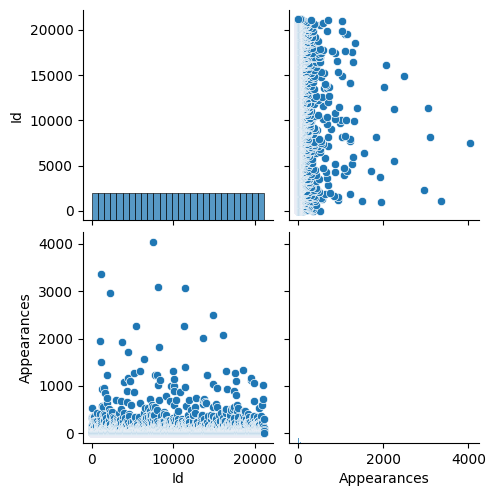

In [145]:
sns.pairplot(df)
plt.show()

# Universe

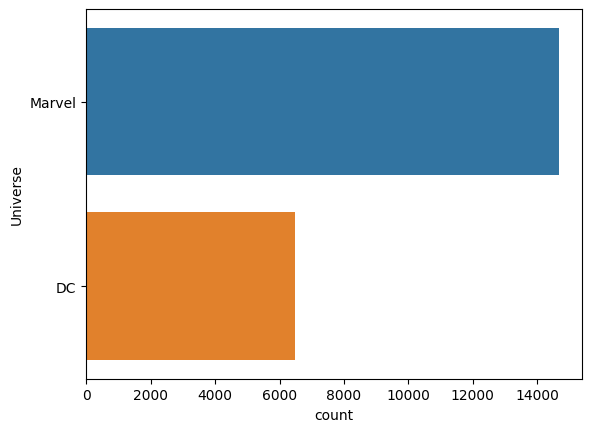

In [146]:
sns.countplot(data=df,y='Universe')
plt.show()

universe_count = df['Universe'].value_counts().reset_index()
universe_count.columns = ['Universe', 'Count']

fig_universe = px.bar(universe_count, x='Universe', y='Count', title='Character Universe Distribution')
fig_universe.show()

# Planet

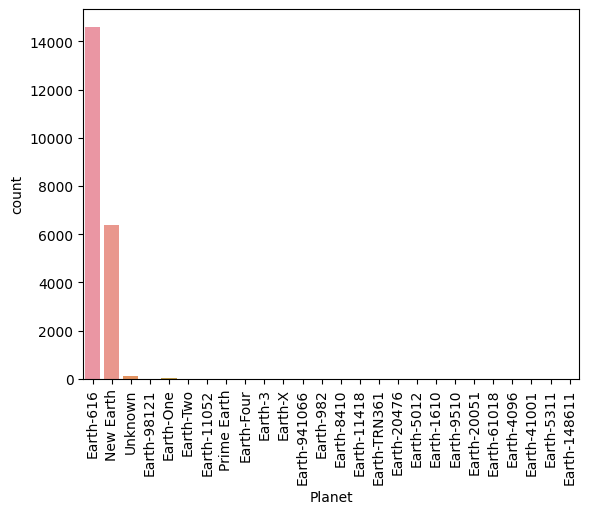

In [147]:
sns.countplot(data=df,x='Planet')
plt.xticks(rotation=90)
plt.show()

# Sex

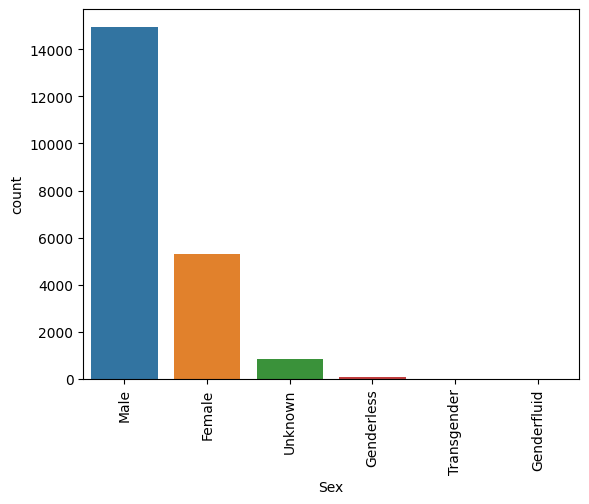

In [148]:
sns.countplot(data=df,x='Sex')
plt.xticks(rotation=90)
plt.show()

# Identity

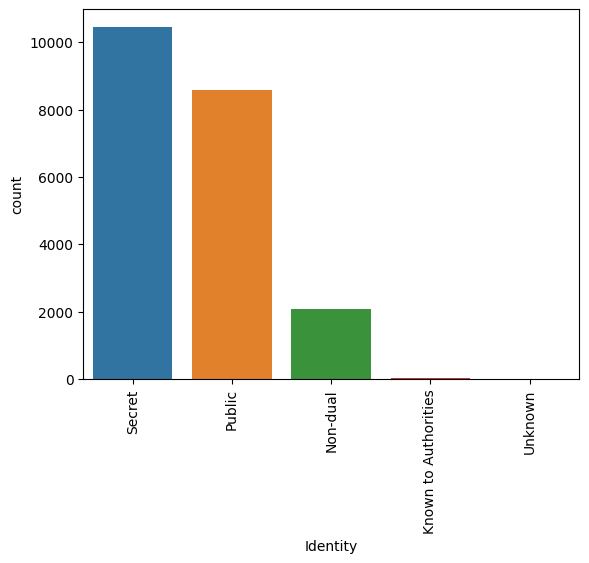

In [149]:
sns.countplot(data=df,x='Identity')
plt.xticks(rotation=90)
plt.show()

# Alignment

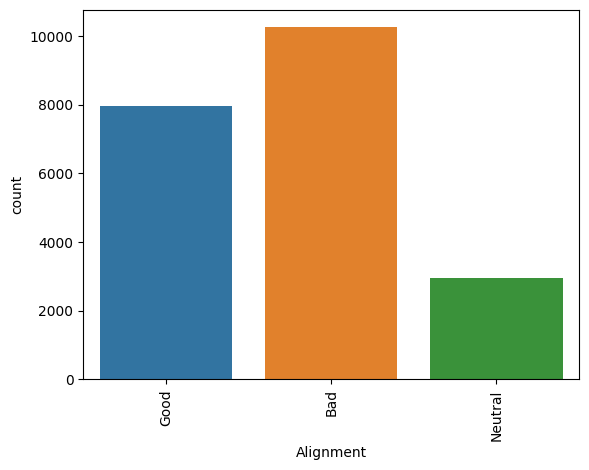

In [150]:
sns.countplot(data=df,x='Alignment')
plt.xticks(rotation=90)
plt.show()

alignment_count = df['Alignment'].value_counts().reset_index()
alignment_count.columns = ['Alignment', 'Count']

fig_alignment = px.bar(alignment_count, x='Alignment', y='Count', title='Character Alignment Count')
fig_alignment.show()

# Eyes

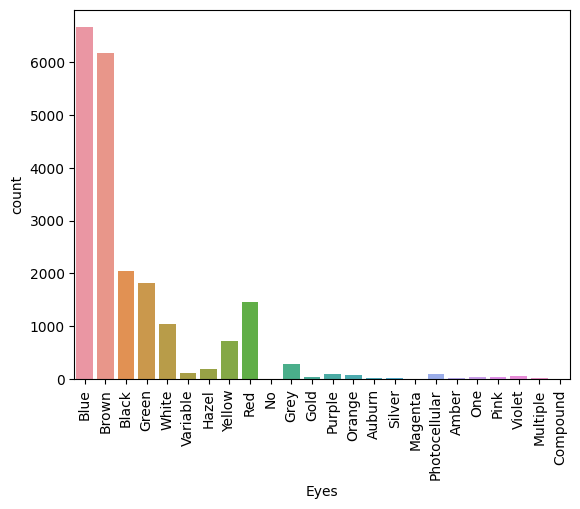

In [151]:
sns.countplot(data=df,x='Eyes')
plt.xticks(rotation=90)
plt.show()

# Hair

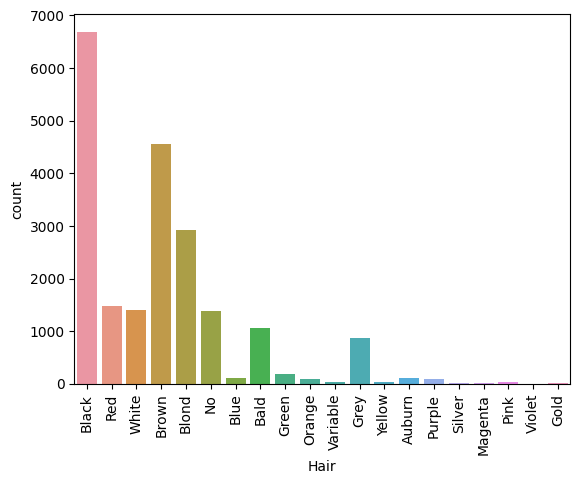

In [152]:
sns.countplot(data=df,x='Hair')
plt.xticks(rotation=90)
plt.show()

# Alive

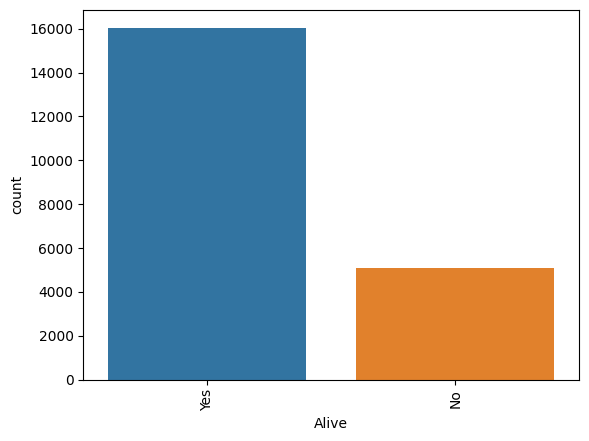

In [153]:
sns.countplot(data=df,x='Alive')
plt.xticks(rotation=90)
plt.show()

alive_count = df['Alive'].value_counts().reset_index()
alive_count.columns = ['Alive', 'Count']

fig_alive = px.pie(alive_count, values='Count', names='Alive', title='Character Alive Status')
fig_alive.show()

# Appearances

In [154]:
fig_appearances = px.histogram(df, x='Appearances', title='Character Appearances Histogram')
fig_appearances.show()

# 'Appearances' vs. 'First_appeared'

In [155]:
fig_scatter = px.scatter(df, x='Appearances', y='First_appeared', title='Character Appearances vs. First Appearance')
fig_scatter.show()

# 'Appearances' by 'Alignment'

In [156]:
fig_box_alignment = px.box(df, x='Alignment', y='Appearances', title='Character Appearances by Alignment')
fig_box_alignment.show()

# 'Appearances' by 'Sex'

In [157]:
# Box plot 
fig_box_sex = px.box(df, x='Sex', y='Appearances', title='Character Appearances by Sex')
fig_box_sex.show()

# Histogram 
fig_hist_sex = px.histogram(df, x='Appearances', color='Sex', title='Character Appearances Histogram by Sex')
fig_hist_sex.show()

# 'Appearances' by 'Hair' color

In [158]:
fig_hist_hair_color = px.histogram(df, x='Appearances', color='Hair', title='Character Appearances by Hair Color')
fig_hist_hair_color.show()

# 'Appearances' vs. 'Appearances'

In [159]:
fig_scatter_appearances = px.scatter(df, x='Appearances', y='Appearances', title='Character Appearances vs. Appearances')
fig_scatter_appearances.show()

# 3D Scatter plot for 'Appearances' vs. 'First_appeared' vs. 'Alignment'

In [160]:
fig_3d_scatter = px.scatter_3d(df, x='Appearances', y='First_appeared', z='Alignment', 
                                color='Alignment', title='3D Scatter Plot: Appearances vs. First Appearance vs. Alignment')
fig_3d_scatter.show()

# 3D Scatter plot for 'Appearances' vs. 'First_appeared' vs. 'Universe'

In [161]:
fig_3d_scatter_universe = px.scatter_3d(df, x='Appearances', y='First_appeared', z='Universe', 
                                         color='Universe', title='3D Scatter Plot: Appearances vs. First Appearance vs. Universe')
fig_3d_scatter_universe.show()


# 3D Scatter plot for 'Appearances' vs. 'Planet' vs. 'Alignment'

In [162]:
fig_3d_scatter_planet = px.scatter_3d(df, x='Appearances', y='Planet', z='Alignment', 
                                      color='Alignment', title='3D Scatter Plot: Appearances vs. Planet vs. Alignment')
fig_3d_scatter_planet.show()


# 3D Scatter plot for 'Appearances' vs. 'First_appeared' vs. 'Universe' with color by 'Alignment'

In [163]:
fig_3d_scatter_universe_alignment = px.scatter_3d(df, x='Appearances', y='First_appeared', z='Universe',
                                                  color='Alignment', title='3D Scatter Plot: Appearances vs. First Appearance vs. Universe (colored by Alignment)')
fig_3d_scatter_universe_alignment.show()

# Sunburst chart to explore hierarchical data, e.g., 'Universe' and 'Alignment' relationships

In [164]:
fig_sunburst = px.sunburst(df, path=['Universe', 'Alignment'], title='Sunburst Chart: Universe and Alignment Relationship')
fig_sunburst.show()